### SHAP

`SHAP` (SHapley Additive exPlanations) values are a powerful method to explain the output of any machine learning model by quantifying the contribution of each feature to the model's prediction. They provide consistent and locally accurate feature attributions using concepts from cooperative game theory.

#### Importance of SHAP Values in the AI ImpactSense Project

The AI ImpactSense project involves predicting earthquake impact levels (like damage or risk zones) using geophysical and environmental data. Because such predictions affect disaster response and urban planning, it is crucial to understand which features (e.g., depth, magnitude, soil type, location) drive the model's decisions. SHAP values enable this interpretability by showing how each feature positively or negatively influences the predicted risk or damage level. This helps build trust in the model, aids in debugging, and supports informed decision-making by stakeholders.

#### Explanation of SHAP Values with Coding Example

Below is a simplified example illustrating how to calculate and interpret SHAP values using a Random Forest model for a classification task similar to ImpactSense (e.g., predicting risk category based on earthquake features):

In [1]:
# Import the necessary libraries
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example synthetic dataset: features similar to ImpactSense
data = pd.DataFrame({
    'depth': np.random.uniform(1, 100, 100),
    'magnitude': np.random.uniform(4.0, 7.0, 100),
    'soil_type': np.random.choice([0, 1], 100),  # 0=soft, 1=hard
    'latitude': np.random.uniform(-90, 90, 100),
    'longitude': np.random.uniform(-180, 180, 100),
    'risk': np.random.choice([0, 1], 100)  # 0=low risk, 1=high risk
})

X = data.drop('risk', axis=1)
y = data['risk']

# Split Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [3]:
# Create SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

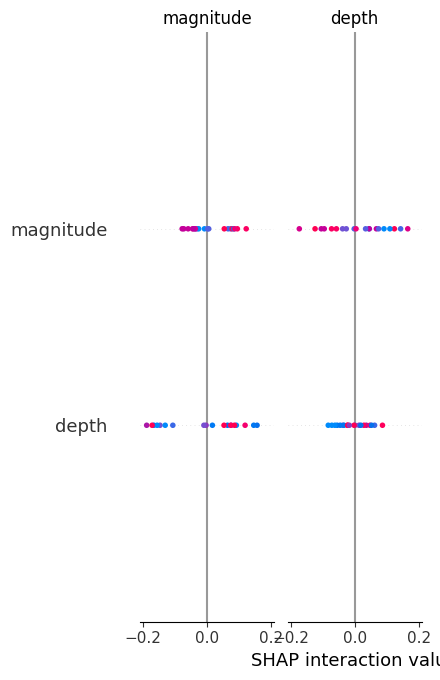

In [4]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

- Task: Load the RandomforestRegressor trained model, plot the SHAP values of the trained model using the preprocessed dataset.: